<a href="https://colab.research.google.com/github/WallaceHS20/IA-CLASSIFICACAO/blob/main/ia_predicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# CARREGANDO CSV
data = pd.read_csv('/content/sample_data/Electronic_sales_Sep2023-Sep2024.csv')
data.head(5)



,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [ ]:
print(data.dtypes)

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Preparar a variável alvo
data['Liked'] = (data['Rating'] >= 4).astype(int)  # Cria uma coluna 'Liked' como alvo

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criar encoders separados
gender_encoder = LabelEncoder()
product_type_encoder = LabelEncoder()

# Ajustar os encoders
data['Gender'] = gender_encoder.fit_transform(data['Gender'])
data['Product Type'] = product_type_encoder.fit_transform(data['Product Type'])


In [ ]:
# Selecionar características e a variável alvo
X = data[['Age', 'Gender', 'Total Price', 'Unit Price', 'Quantity', 'Product Type']]
y = data['Liked']

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# Treinar um modelo de classificação
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# Fazer previsões
predictions = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

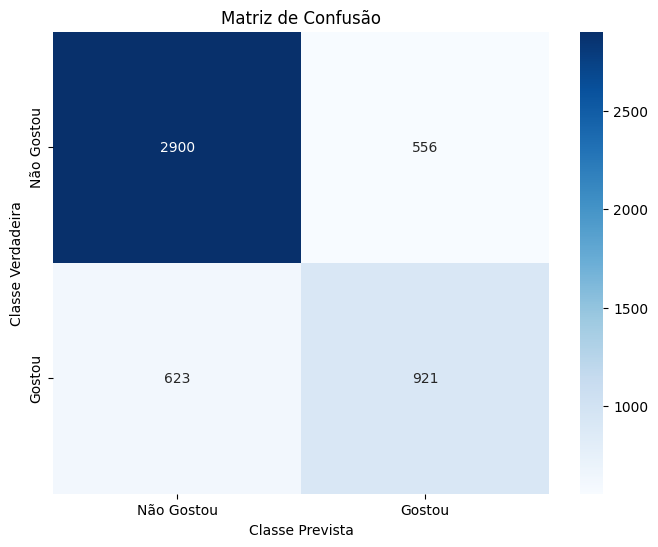

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, predictions)

# Criar um gráfico de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Gostou', 'Gostou'], yticklabels=['Não Gostou', 'Gostou'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()


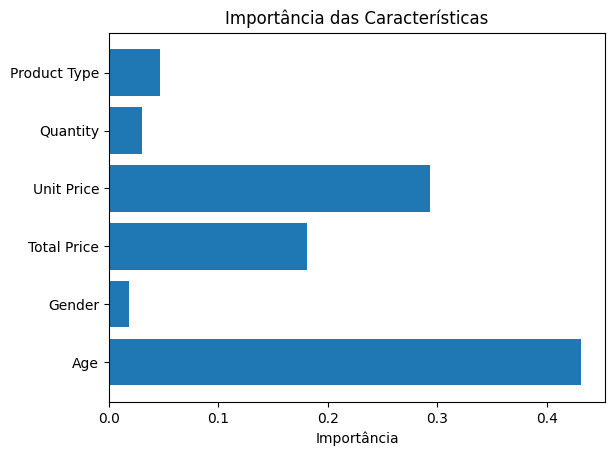

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.title('Importância das Características')
plt.show()


In [ ]:
# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.7642
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      3456
           1       0.62      0.60      0.61      1544

    accuracy                           0.76      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.76      0.76      0.76      5000



In [ ]:
import numpy as np
import pandas as pd

def predict_liked(age, gender, total_price, unit_price, quantity, product_type):
    try:
        # Codificar o tipo de produto e o gênero usando seus respectivos encoders
        product_type_encoded = product_type_encoder.transform([product_type])[0]
        gender_encoded = gender_encoder.transform([gender])[0]

        # Criar um DataFrame com as características, incluindo todos os recursos
        input_features = pd.DataFrame({
            'Age': [age],
            'Gender': [gender_encoded],
            'Total Price': [total_price],
            'Unit Price': [unit_price],
            'Quantity': [quantity],
            'Product Type': [product_type_encoded]
        })

        # Fazer a previsão
        prediction = model.predict(input_features)

        # Retornar o resultado
        return "Gostou" if prediction[0] == 1 else "Não Gostou"

    except ValueError as e:
        return str(e)  # Retornar a mensagem de erro se uma categoria inválida for inserida


In [ ]:
result = predict_liked(35, 'Female', 150, 50, 2, 'Smartwatch')
print(f"A previsão é: {result}")


A previsão é: Gostou


In [1]:
!pip freeze > requirements.txt


In [2]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>